## 1.2 Modelo SIR com nascimentos e mortes

Baseado em: http://homepages.warwick.ac.uk/~masfz/ModelingInfectiousDiseases/Chapter2/Program_2.2/index.html

Considerando que uma doença infecciosa "assombra" uma localidade em um longo prazo, é importante considerar os processos demográficos de nascimentos e de morte.

A maneira mais simples e mais comum de introduzir a demografia no modelo SIR é assumir que existe uma "vida útil" natural do hospedeiro, $\frac{1}{\mu}$ anos. Então, a taxa em que indivíduos (em qualquer das classes epidemiológicas) sofrem mortalidade natural é dada por $\mu$.

Neste cenário, assumiu-se que $\mu$ também representa a taxa bruta de nascimentos da população, de forma que o tamanho total da população não mude ao longo do tempo

\begin{align*}
\frac{dS(t)}{dt} + \frac{dI(t)}{dt} + \frac{dR(t)}{dt} = 0
\end{align*}

### 1.2.1 Faça o questionamento

**Problema**: COVID-19, uma nova cepa do _Corona vírus_ muito contagioso apareceu no mundo. O vírus de origem chinesa está se espalhando e matando rapidamente.

**Questionamento**: Qual seria o momento de pico de contaminação aqui no Brasil? Modele a expansão dessa pandemia.

**Variáveis**:

 * $t$ = unidade de tempo (em dia);
 * $P_\text{total}$ = tamanho da população brasileira residente no país;
 * $P_i(0)$ = população de infectados no tempo $t=0$;
 * $E$ = Expectativa de vida (em dias), [segundo IBGE (2017)](https://agenciabrasil.ebc.com.br/geral/noticia/2018-11/expectativa-de-vida-do-brasileiro-cresce-e-mortalidade-infantil-cai);


 * $\mu$ = taxa de morte per capta e taxa populacional de nascimentos. $E = \frac{1}{\mu}$;
 * $\beta$ = taxa de transmissão. Incorpora a taxa de encontro entre indivíduos suscetíveis e infecciosos, juntamente com a probabilidade de transmissão.
    Número de assinantes (assinantes);
 * $\gamma$ = taxa de remoção ou a taxa de recuperação, embora frequentemente estejamos mais interessados em sua recíproca (1/$\gamma$), que determina o período infeccioso médio;


 * $S(t)$ = proporção de indivíduos não infectados com a doença no momento $t$, ou aqueles suscetíveis à doença;
 * $I(t)$ = proporção de indivíduos que tenham sido infectadas com a doença e que são capazes de transmitir a doença aos da categoria susceptível;
 * $R(t)$ = proporção de recuperados (removidos a partir da doença);

    
 * $S(0)$ = proporção inicial da população que está suscetível;
 * $I(0)$ = proporção inicial da população que está suscetível;
 * $R(0)$ = proporção inicial de recuperados da doença.

**Hipóteses (_assumptions_):**

 * $S(0)+I(0)$ $\geq 1$;  

 
 * $P_\text{total}$ = $S(t) + I(t) + R(t) = 200.000.000$ (estimativa);
 * $P_i(0)$ = $1$, pois é um vírus novo, ao contrário da gripe, por exemplo;  
 * $E$ = $76$ anos $\approx 27740$ dias;


 * $S(0)$ = $\frac{P_\text{total} - P_i(0)}{P_\text{total}} = 
    \frac{200.000.000 - 1}{200.000.000} = 0,999.999.995$,  pois é um vírus novo, ao contrário da gripe, por exemplo;
 * $I(0)$ = $\frac{P_\text{total} - P_i(0)}{P_\text{total}} = 
    \frac{1}{200.000.000} = 0,000.000.005$
     pois o vírus veio importado;
 * $R(0)$ = $0$;  


 * $\mu$ = $\frac{1}{E} = \frac{1}{27740}$;
 * $\beta$ = Definido nas simulações;
 * $\gamma$ = Definido nas simulações.

**Objetivo:** Encontrar o $t$ em $I(t)$ atinge o maior valor.

### 1.2.2 Selecione a abordagem do modelo

A abordagem selecionada para a resolução do problema é a resolução do sistema SIR.


### 1.2.3 Formule o modelo

Tendo em consideração que o modelo foi construído enviesado ao sistema SIR, podemos já utilizar as equações:

\begin{align*}
    \frac{dS(t)}{dt} &= \mu - \beta S(t)I(t) - \mu S(t)\\
    \frac{dI(t)}{dt} &=  \beta S(t)I(t) - \gamma I(t) - \mu I(t) \\
    \frac{dR(t)}{dt} &=  \gamma I(t) - \mu R(t)
\end{align*}

### 1.2.4 Solucione o modelo

O modelo foi executado iterativamente. Abaixo as simulações para diferentes valores de $\beta$ e de  $\gamma$.

In [3]:
import scipy.integrate as spi
import numpy as np
import pylab as pl

from plot import plot

In [14]:
def simulacao(β, γ):
    P = 200_000_000
    P_i = 1
    E = 76 * 365.

    S_0 = (P-P_i)/P
    I_0 = P_i/P
    R_0 = 0
    
    μ = 1/E

    def diff_eqs(passo_anterior, t):
        S, I, R = passo_anterior

        S_next = μ - β*S*I - μ*S
        I_next = β*S*I - γ*I - μ*I
        R_next = γ*I - μ*R

        return np.array([S_next, I_next, R_next])

    INPUT = (S_0, I_0, R_0)
    
    tempo_step = 1.
    numero_dias = 90.0

    t_inicio = 0.0; t_fim = numero_dias; t_incremento = tempo_step
    t_intervalo = np.arange(t_inicio, t_fim + t_incremento, t_incremento)

    plot(spi.odeint(diff_eqs, INPUT, t_intervalo))

#### 1.2.4.1 Cenário 1

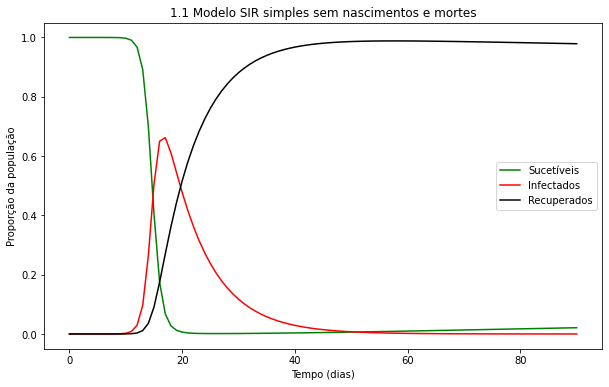

In [15]:
simulacao(β = 1.4247, γ = 0.14286)

#### 1.2.4.2 Cenário 2

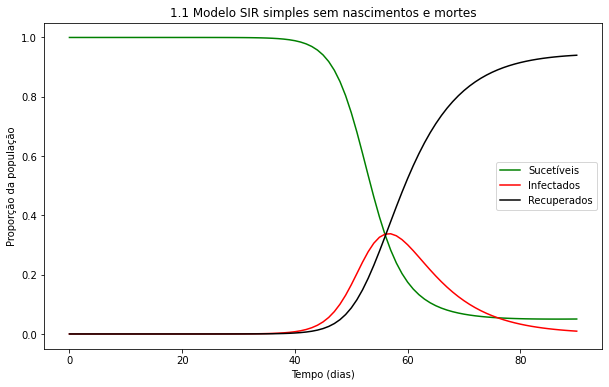

In [16]:
simulacao(β = .5, γ = 0.15)

#### 1.2.4.3 Cenário 3

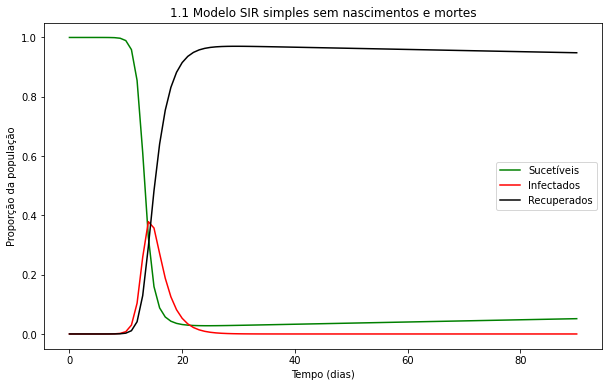

In [18]:
simulacao(β = 1.9, γ = 0.5)

### 1.2.5 Responda o questionamento

Foram testados três cenários